In [2]:
#package
import numpy as np
import torch as T
import matplotlib.pyplot as plt

#private
import src.pipeline as pl
import src.utils as utils
import src.plotting as plot
import src.eval_utils as eval_utils

python(60036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [3]:
OT_PATHS = [
    "/Users/gretabrianti/Work/decorrelation_methods2/ot_decorrelation/output_7"
    ]
eval_data_path = "/Users/gretabrianti/Work/decorrelation_methods2/ot_input/output_zenodo.h5"

In [4]:

output, data = pl.load_multi_cls(eval_data_path, upper_mass_cut=450)

data = data[data.label!=1]

results = data[["mass", "label", "w_score"]]



In [5]:
output

{'mass': array([77.447 , 84.433 , 58.3208, ..., 91.5115, 93.2057, 84.4498]),
 'labels': array([1., 1., 1., ..., 0., 0., 0.]),
 'encodings': array([0.95927244, 0.98013306, 0.20402808, ..., 0.64394706, 0.51727259,
        0.97940391])}

In [6]:
evaluate = eval_utils.EvalauteFramework("evaluate/", plot_bool=True, save_path='/Users/gretabrianti/Work/methods_for_decorrelation/ot-decorrelation')


In [7]:
label= 'DNN_label'
results = results.rename(columns={"w_score": label, "label": "labels", "mass": 'mass'})

output = {i: results[i].values for i in results.columns}
print(output)
conds = output.pop("mass")

evaluate.redefine_output(output=output,conds=conds, clf_col=label)
output

{'mass': array([ 55.856 , 101.13  , 104.163 , ...,  91.5115,  93.2057,  84.4498]), 'labels': array([0., 0., 0., ..., 0., 0., 0.]), 'DNN_label': array([0.36026818, 0.45161632, 0.38720614, ..., 0.64394706, 0.51727259,
       0.97940391])}


{'labels': array([0., 0., 0., ..., 0., 0., 0.]),
 'DNN_label': array([0.36026818, 0.45161632, 0.38720614, ..., 0.64394706, 0.51727259,
        0.97940391])}

In [8]:
evaluate.run_ot(ot_path=OT_PATHS[0], device='cpu', col_name='w_score_after_OT')

Number of trainable parameters: 1046670
Number of trainable parameters: 1046670
checkpoint_99.pth


KeyboardInterrupt: 

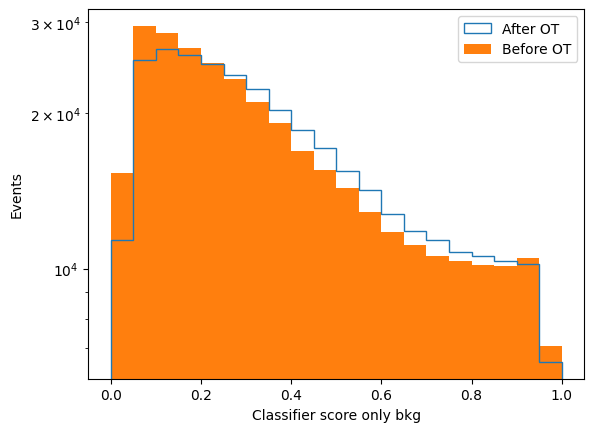

In [ ]:
plt.hist(output['w_score_after_OT'],range=(0,1),bins=20,histtype='step', label='After OT')
plt.hist(output['DNN_label'],range=(0,1),bins=20, label='Before OT')
# plt.scatter(data['mass'],(output['w_score_after_OT']),marker='.')
# plt.scatter(data['mass'],(output['DNN_label']),marker='.')
# plt.ylabel('Classifier output')
# plt.ylabel('Classifier output')
plt.xlabel('Classifier score only bkg')
plt.ylabel('Events')
plt.legend()
plt.yscale('log')

Text(0.5, 0, 'Binary output (bkg only)')

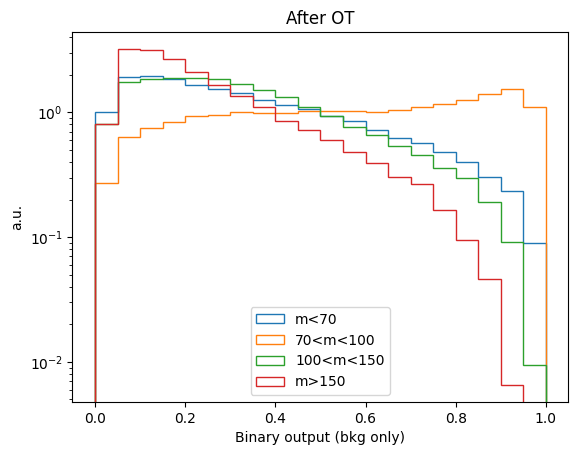

In [ ]:
plt.hist(output['w_score_after_OT'][results['mass']<70],range=(0,1),bins=20,histtype='step', label='m<70',density=True)
plt.hist(output['w_score_after_OT'][(results['mass']>70) & (results['mass']<100)],histtype='step',range=(0,1),bins=20, label='70<m<100',density=True)
plt.hist(output['w_score_after_OT'][(results['mass']>100) & (results['mass']<150)],histtype='step',range=(0,1),bins=20, label='100<m<150',density=True)
plt.hist(output['w_score_after_OT'][(results['mass']>150)],range=(0,1),bins=20, histtype='step',label='m>150',density=True)
plt.yscale('log')
plt.legend()
plt.title('After OT')
plt.ylabel('a.u.')
plt.xlabel('Binary output (bkg only)')

Text(0.5, 0, 'Binary output (bkg only)')

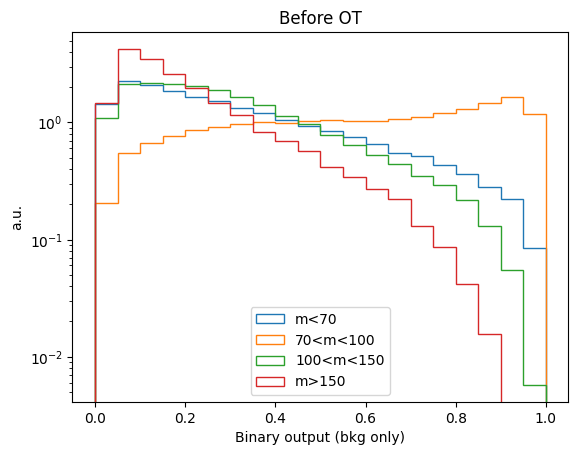

In [ ]:
plt.hist(output['DNN_label'][results['mass']<70],range=(0,1),bins=20,histtype='step', label='m<70',density=True)
plt.hist(output['DNN_label'][(results['mass']>70) & (results['mass']<100)],histtype='step',range=(0,1),bins=20, label='70<m<100',density=True)
plt.hist(output['DNN_label'][(results['mass']>100) & (results['mass']<150)],histtype='step',range=(0,1),bins=20, label='100<m<150',density=True)
plt.hist(output['DNN_label'][(results['mass']>150)],range=(0,1),bins=20, histtype='step',label='m>150',density=True)
plt.yscale('log')
plt.legend()
plt.title('Before OT')
plt.ylabel('a.u.')
plt.xlabel('Binary output (bkg only)')

In [ ]:
jsd_lst_disco_0, sig_eff, background_rej = evaluate.bkg_rej_calculation(
                'w_score_after_OT_0', legend_kwargs={"title":'after OT'})
jsd_lst_disco_1, sig_eff, background_rej = evaluate.bkg_rej_calculation(
                'w_score_after_OT_1', legend_kwargs={"title":'after OT'})
jsd_lst_disco_2, sig_eff, backgroud_rej = evaluate.bkg_rej_calculation(
                'w_score_after_OT_2', legend_kwargs={"title":'after OT'})
jsd_lst_disco_3, sig_eff, background_rej = evaluate.bkg_rej_calculation(
                'w_score_after_OT_3', legend_kwargs={"title":'after OT'})
jsd_lst_disco_4, sig_eff, background_rej = evaluate.bkg_rej_calculation(
                'w_score_after_OT_4', legend_kwargs={"title":'after OT'})

jsd_lst_disco_bef, sig_eff, background_rej = evaluate.bkg_rej_calculation(
                'DNN_label', legend_kwargs={"title":'before OT'})

NameError: name 'evaluate' is not defined

In [ ]:
1./jsd_lst_disco

array([868.41381431, 110.00618294,  40.83283846,  10.80532018])

<ErrorbarContainer object of 3 artists>

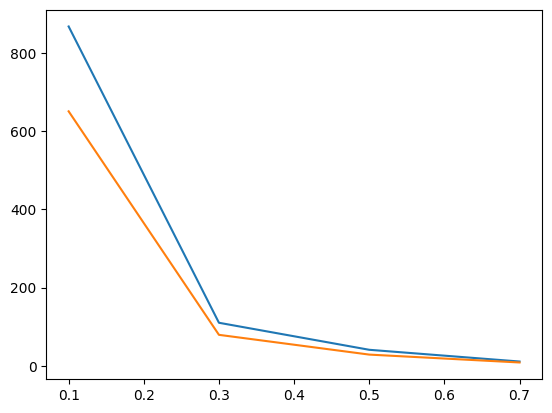

In [ ]:
plt.errorbar([0.1,0.3,0.5,0.7],1./jsd_lst_disco, label='')
plt.errorbar([0.1,0.3,0.5,0.7],1./jsd_lst_disco_bef)

In [ ]:
bkg_after_OT=np.squeeze(output['w_score_after_OT']) 
bkg_before_OT=np.squeeze(output['DNN_label']) 
cut_list_bkg_after=[]
cut_list_bkg_before=[]
for i in range(9):
    if(i==0): continue
    cut_list_bkg_after.append(np.percentile(bkg_after_OT, i*10))
    cut_list_bkg_before.append(np.percentile(bkg_before_OT, i*10))

In [ ]:
bkg_after_OT-bkg_before_OT

array([ 0.06295562,  0.02294791,  0.02861115, ..., -0.00546968,
       -0.0012784 , -0.00136161])

In [ ]:
cut_list_bkg_after

[0.09284228384494782,
 0.155156472325325,
 0.21927084177732467,
 0.2874869525432587,
 0.36170606315135956,
 0.44751580357551574,
 0.5484610378742218,
 0.6734011054039002]

In [ ]:
cut_list_bkg_before

[0.07983720898628235,
 0.13670078814029693,
 0.19777536690235137,
 0.26387475728988646,
 0.3387894779443741,
 0.42653048038482666,
 0.5333957076072693,
 0.6668800234794617]

In [ ]:
len(mass[bkg_after_OT>=cut_list_bkg_after[3]])==len(mass[bkg_before_OT>=cut_list_bkg_before[3]])

True

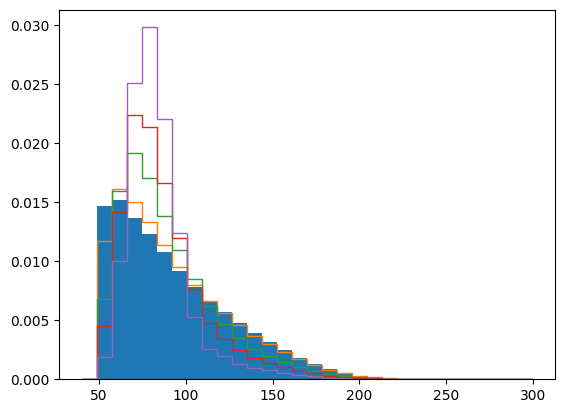

In [ ]:
mass = results['mass'][output['labels']==0]
plt.hist(mass,density=True,range=(40,300), bins=30)
plt.hist(mass[bkg_after_OT>=cut_list_bkg_after[0]],density=True,range=(40,300), bins=30, histtype='step')
plt.hist(mass[bkg_after_OT>=cut_list_bkg_after[3]],density=True,range=(40,300), bins=30, histtype='step')
plt.hist(mass[bkg_after_OT>=cut_list_bkg_after[5]],density=True,range=(40,300), bins=30, histtype='step')
plt.hist(mass[bkg_after_OT>=cut_list_bkg_after[7]],density=True,range=(40,300), bins=30, histtype='step')
# plt.yscale('log')
plt.show()

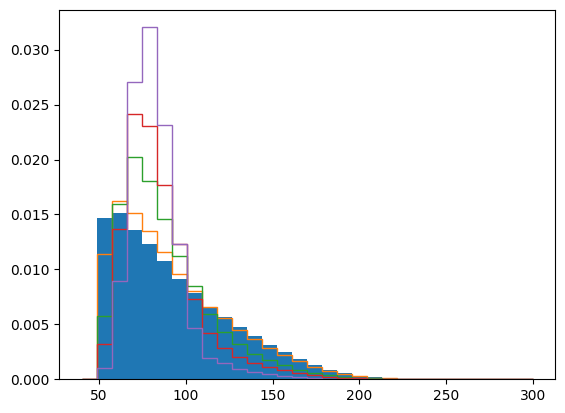

In [ ]:
mass = results['mass'][output['labels']==0]
plt.hist(mass,density=True,range=(40,300), bins=30)
plt.hist(mass[bkg_before_OT>=cut_list_bkg_before[0]],density=True,range=(40,300), bins=30, histtype='step')
plt.hist(mass[bkg_before_OT>=cut_list_bkg_before[3]],density=True,range=(40,300), bins=30, histtype='step')
plt.hist(mass[bkg_before_OT>=cut_list_bkg_before[5]],density=True,range=(40,300), bins=30, histtype='step')
plt.hist(mass[bkg_before_OT>=cut_list_bkg_before[7]],density=True,range=(40,300), bins=30, histtype='step')
# plt.yscale('log')
plt.show()


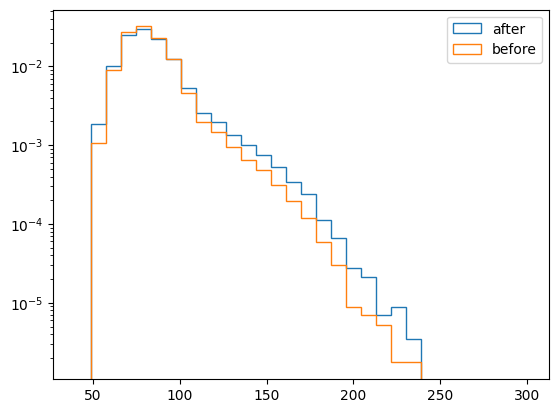

In [ ]:
mass = results['mass'][output['labels']==0]
plt.hist(mass[bkg_after_OT>=cut_list_bkg_after[7]],density=True,range=(40,300), bins=30, histtype='step', label='after')
plt.hist(mass[bkg_before_OT>=cut_list_bkg_before[7]],density=True,range=(40,300), bins=30, histtype='step', label='before')
plt.yscale('log')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pickle
import pandas as pd
import torch
import matplotlib.pyplot as plt
import uproot3
from scipy.optimize import curve_fit
from scipy.stats import entropy,ks_2samp

In [ ]:
#Kullback-Leibler divergence
def kl_divergence(p, q):
    kl_final=0
    kl=[]
    
    kl_final=np.sum((p[q!=0]/np.sum(p)) * np.log2((p[q!=0]/np.sum(p)) / (q[q!=0]/np.sum(q))))
            
    return kl_final

#Jensen-Shannon divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * (kl_divergence(p, m) + kl_divergence(q, m))

#Jensen-Shannon divergence
def js_divergence_scipy(p, q):
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m)/np.log(2) + entropy(q, m)/np.log(2))


#New metric
def difference_sum(p, q):
    val = 0.5*np.sum(np.abs(p/np.sum(p)-(q/np.sum(q))))
    return val

def ks_2samp_f(p,q):
    _,pvalue = ks_2samp(p,q)
    return pvalue

In [ ]:
jsd_list_vs_sig_eff_lambda0=[]
jsd_list_vs_bkg_eff_lambda0=[]
error_jsd_list_vs_sig_eff_lambda0=[]
error_jsd_list_vs_bkg_eff_lambda0=[]
num_events_bkg_fail_lambda0=[]
num_events_bkg_pass_lambda0=[]
AD_list_vs_sig_eff_lambda0=[]
AD_list_vs_bkg_eff_lambda0=[]
pKS_list_vs_sig_eff_lambda0=[]
pKS_list_vs_bkg_eff_lambda0=[]
xmin=20
xmax=200
bins=30
var_bkg = results['mass'][output['labels']==0]

for i in range(8):
    
    hist_pass_bkg, bin_edges = np.histogram(var_bkg[bkg_before_OT>=cut_list_bkg_before[i]], range=(xmin,xmax), bins=bins)
    hist_fail_bkg, bin_edges = np.histogram(var_bkg, range=(xmin,xmax), bins=bins)
    num_events_bkg_fail_lambda0.append(np.sum(hist_fail_bkg))
    num_events_bkg_pass_lambda0.append(np.sum(hist_pass_bkg))
    
    AD_list_vs_bkg_eff_lambda0.append(difference_sum(hist_fail_bkg,hist_pass_bkg))
    
    jsd_list_vs_bkg_eff_lambda0.append(js_divergence_scipy(hist_fail_bkg,hist_pass_bkg))
    
    pKS_list_vs_bkg_eff_lambda0.append(ks_2samp_f(hist_fail_bkg,hist_pass_bkg))
        

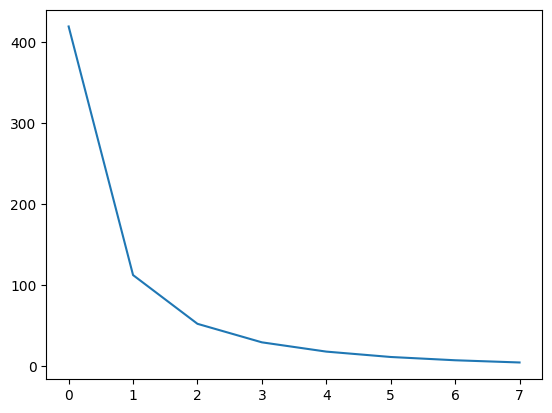

In [ ]:
plt.plot(1./np.array(jsd_list_vs_bkg_eff_lambda0))

In [ ]:
1./np.array(jsd_list_vs_bkg_eff_lambda0)

array([419.35301515, 112.18742462,  51.96228897,  29.08743208,
        17.62657928,  10.98018019,   6.93613808,   4.19917014])

In [ ]:
jsd=np.array([0.00153553, 0.01264143, 0.03504963, 0.11970398])

In [ ]:
1./jsd

array([651.24093961,  79.10497467,  28.53097165,   8.35394111])